# Cross section for astrometric microlensing

In order to produce a centroid shift $\delta>\delta_T$, the source has to stay within a certain distance from the lens. This can be seen by looking at the shape of the function $\delta(y)$:

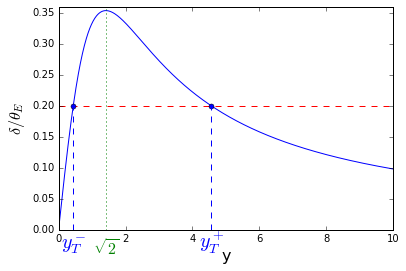

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def delta(y):
    return (y/(y**2+2))

y=np.linspace(0,10,1000)
d=delta(y)

plt.plot(y,d)

x1=[np.sqrt(2),np.sqrt(2)]
x2=[0,10]
plt.plot(x1,x2,":")
plt.ylim([0,0.36])

x1=[0,10]
dt=[0.2,0.2]
plt.plot(x1,dt,"--")

plt.xlabel('y',fontsize=16)
plt.ylabel(r'$\delta/\theta_E$',fontsize=16)

def yT1(K):
    return(K/2.0+np.sqrt(K**2/4.0-2.0))

def yT2(K):
    return(K/2.0-np.sqrt(K**2/4.0-2.0))

yt=[yT1(1.0/dt[0]),yT2(1.0/dt[0])]

plt.plot(yt,dt,'o',markersize=5,color='blue')
plt.plot([yt[0],yt[0]],[0.0,dt[0]],'--',color='blue')
plt.plot([yt[1],yt[1]],[0.0,dt[0]],'--',color='blue')
plt.text(yt[1],-0.03,'$y_T^-$',fontsize=20,horizontalalignment='center',color='blue')
plt.text(yt[0],-0.03,'$y_T^+$',fontsize=20,horizontalalignment='center',color='blue')
plt.text(np.sqrt(2.0),-0.04,'$\sqrt{2}$',fontsize=16,horizontalalignment='center',color='green')

As we have seen, the function has a maximum in $y=\sqrt{2}$. Setting the threshold at $\delta/\theta_E=1/K$, then $\delta>\delta_T$ for 

$$
y_T^-<y<y_T^+
$$

where

$$ 
y_T^{+/-}=\frac{K}{2}\pm\sqrt{\frac{K^2}{4}-2}
$$

The cross section for astrometric microlensing is 

$$
\sigma=\pi ({y_T^+}^2-{y_T^-}^2)\theta_E^2
$$

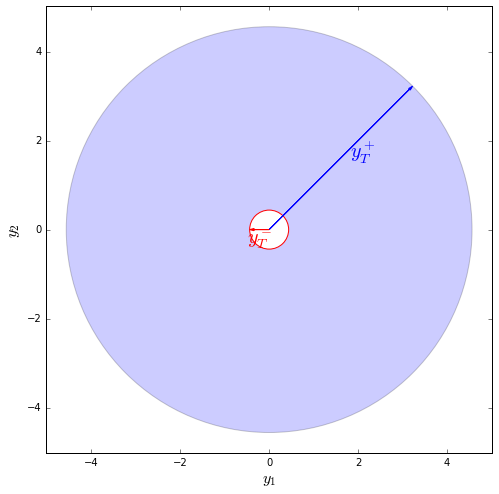

In [63]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
circle_out=plt.Circle((0,0),yt[0],color='black',fc='blue',fill=True,alpha=0.2)
circle_in=plt.Circle((0,0),yt[1],color='red',fill=True,fc='white')
ax.add_artist(circle_out)
ax.add_artist(circle_in)
ax.set_xlim([-yt[0]*1.1,yt[0]*1.1])
ax.set_ylim([-yt[0]*1.1,yt[0]*1.1])
plt.xlabel(r'$y_1$',fontsize=16)
plt.ylabel(r'$y_2$',fontsize=16)
ax.arrow(0, 0, (yt[0]-0.1)*np.cos(np.pi/4), (yt[0]-0.1)*np.sin(np.pi/4), head_width=0.05, head_length=0.1, fc='blue', ec='blue')
ax.arrow(0, 0, -(yt[1]-0.1), 0, head_width=0.05, head_length=0.1, fc='red', ec='red')
ax.text(yt[0]/2.0*np.cos(np.pi/4)+0.2, yt[0]/2.0*np.sin(np.pi/4),r'$y_T^+$',fontsize=20,horizontalalignment='left',color='blue')
ax.text(-yt[1]/2.0, -0.3,r'$y_T^-$',fontsize=20,horizontalalignment='center',color='red')

In the limit $K>>1$, $y_T^{-}\rightarrow 0$, and $y_T^{-}\rightarrow K$. In this case, the central "hole" in the cross section can be neglected, and the cross section can be approximated as
$$
\sigma\approx\frac{\pi\theta_E^4}{\delta_T^2}
$$

# Time variation of the centroid shift

The centroid shift varies with time as

$$
\delta(t) = \frac{y(t)}{y^2(t)+2}
$$

The rate at which it decreases at large $y$ is 

$$
\frac{d\delta}{dt}\approx -58 \frac{1}{y^2}\left(\frac{v}{100 \mathrm{km/s}}\right)\left(\frac{D_L}{1 ~\mathrm{kpc}}\right)~\mu\mathrm{as}~\mathrm{day}^{-1}
$$

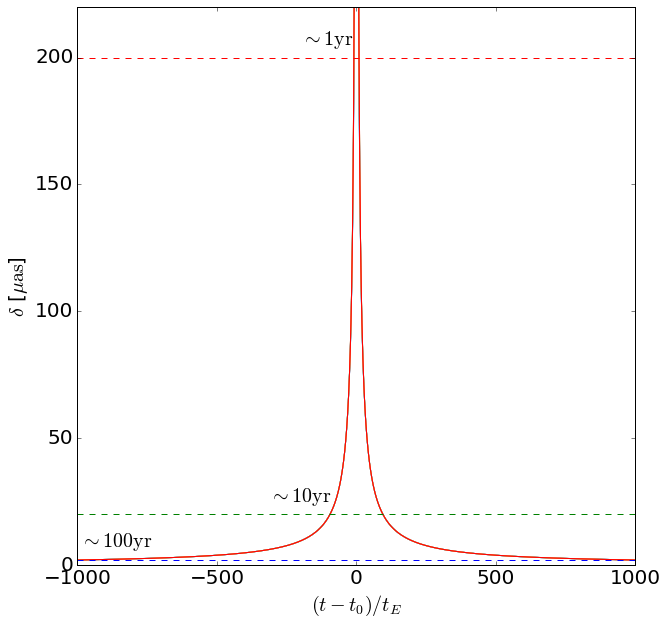

In [101]:
%matplotlib inline
from matplotlib.pyplot import cm 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

t=np.linspace(0,183000,6400)
M_lens=0.5 # solar masses
DL=1.0 # kpc
DS=8.0 # kpc
vel=100 # km/s
y0=np.linspace(1.0,0.1,10)*2.0*np.sqrt(2.0)
t0=np.amax(t)/2.0 # days

def tterm(M,DL,DS,v,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return ((t-t0)/tE)

def shift_par(M,DL,DS,v,y0,t0,t):
    tt=tterm(M,DL,DS,v,t0,t)
    yy=np.sqrt(y0**2+tt**2)
    return(tt/(yy**2+2))

def shift_per(M,DL,DS,v,y0,t0,t):
    tt=tterm(M,DL,DS,v,t0,t)
    yy=np.sqrt(y0**2+tt**2)
    return(y0/(yy**2+2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)

tt=tterm(M_lens,DL,DS,vel,t0,t)
thetae=theta_e_func(M_lens,DL,DS)*1.e6

fig,ax=plt.subplots(1,1,figsize=(10,10))

color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    sx=shift_par(M_lens,DL,DS,vel,y0[i],t0,t)
    sy=shift_per(M_lens,DL,DS,vel,y0[i],t0,t)    
    ax.plot(tt,np.sqrt(sx**2+sy**2)*thetae,'-',c=c)

    
ax.set_xlim([-1000,1000])
ax.set_ylim([0.0,220])
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax.set_ylabel('$\delta$ [$\mu\mathrm{as}$]',fontsize=20)

xx=[-1000,1000]
yy=[2,2]
ax.plot(xx,yy,'--')
ax.text(-990,7,'$\sim 100\mathrm{yr}$',horizontalalignment='left',fontsize=20)

xx=[-1000,1000]
yy=[20,20]
ax.plot(xx,yy,'--')
ax.text(-90,25,'$\sim 10\mathrm{yr}$',horizontalalignment='right',fontsize=20)

xx=[-1000,1000]
yy=[200,200]
ax.plot(xx,yy,'--')
ax.text(-10,205,'$\sim 1\mathrm{yr}$',horizontalalignment='right',fontsize=20)